# Towards binary classification
### Understand important features using a decision tree

Reading:
- scikit-learn - https://scikit-learn.org/stable/
- Decision Trees - https://scikit-learn.org/stable/modules/tree.html
- Count Vectorizer - https://scikit-learn.org/stable/modules/generated/sklearn.feature_extraction.text.CountVectorizer.html

### To run this notebook you need test_sentiment.zip (in Learning Central)

In [0]:
CURRENT_PATH = "" # path with your dataset

 test_sentiment  'Towards binary classification toy example.ipynb'


In [0]:
import os
from collections import defaultdict
# read each file, add that file to a list of files belonging to the same class
data_path = CURRENT_PATH
# get all files contained in the directory
list_of_files = os.listdir(data_path)
# data is a dictionary where each key is a string, and each value is a list
# Convenient because we do not have to check if the key exists or not, it will always work
data=defaultdict(list)
for one_file in list_of_files:
    #os.path.join joins a path to a folder and a file into one manageable path
    # in windows, something like os.path.join(c:\Users\luis,'file.txt') >>> 'c:\\Users\\luis\\file.txt'
    with open(os.path.join(data_path,one_file),'r') as f:
        for line in f:
            # each line in each file contains one single document
            data[one_file].append(line)
for label in data:
    print('For label ',label,' we have ',len(data[label]),' documents')

For label  neg  we have  3  documents
For label  pos  we have  3  documents


In [0]:
# create label to id dictionary
label2id = {'pos':1,'neg':0}

In [0]:
print(data['neg'][0])

terrible movie and awful plot



In [0]:
print(data['pos'][0])

i loved the movie



- We have a balanced class distribution, 50% positive, 50% negative

In [0]:
len(data['pos']),len(data['neg'])

(3, 3)

In [0]:
# we will also store all documents in a single array to use the following bit of code
all_documents = []
# we will do the same for labels (for later)
all_labels = []
# for each label in the dictionary (key)
for label in data:
    # for each document in the list of documents pertaining to that label
    for document in data[label]:
        # add that document to the array with all documents
        all_documents.append(document)
        all_labels.append(label2id[label])

In [0]:
len(all_documents),type(all_documents)

(6, list)

In [0]:
# Here we start using scikit-learn!
# the CountVectorizer can be used to transform each document into a 'bag-of-words' representation
# https://en.wikipedia.org/wiki/Bag-of-words_model
# Each document is then represented as *presence* or *absence* of the words in our 'bag'
from sklearn.feature_extraction.text import CountVectorizer
# We don't need to use a dictionary for counting word frequency and selecting the important ones.
# sklearn has this (and more advanced) built-in functions!
vectorizer = CountVectorizer(max_features=50, stop_words='english')
X = vectorizer.fit_transform(all_documents)
print('These are our "features":',', '.join(vectorizer.get_feature_names()))
print('A value of zero means that word is not in the document, one if yes')
print('Each value in a document array corresponds by position with the above features')
print(X.toarray())  
print('E.g.: The last document contains the words "action", "fantastic" and "loved"')

These are our "features": action, awful, did, fantastic, just, like, loved, movie, plot, scenery, terrible
A value of zero means that word is not in the document, one if yes
Each value in a document array corresponds by position with the above features
[[0 1 0 0 0 0 0 1 1 0 1]
 [0 0 1 0 0 1 0 0 0 1 0]
 [0 1 0 0 1 0 0 0 1 0 0]
 [0 0 0 0 0 0 1 1 0 0 0]
 [0 0 0 1 0 0 0 0 1 0 0]
 [1 0 0 1 0 0 1 0 0 0 0]]
E.g.: The last document contains the words "action", "fantastic" and "loved"


In [0]:
# Fit a decision tree (classifier based on a set of if-else questions to eventually make an informed decision)
from sklearn import tree
clf = tree.DecisionTreeClassifier()
# The fit method takes two equally long arrays, one with data points (X), and one with labels (all_labels).
# By convention you will see the labels referred to as 'y', and data as 'X'.
clf = clf.fit(X, all_labels)

environ({'ENV': '/root/.bashrc', 'GCS_READ_CACHE_BLOCK_SIZE_MB': '16', 'CLOUDSDK_CONFIG': '/content/.config', 'CUDA_VERSION': '10.0.130', 'PATH': '/usr/local/bin:/usr/local/nvidia/bin:/usr/local/cuda/bin:/usr/local/sbin:/usr/local/bin:/usr/sbin:/usr/bin:/sbin:/bin:/tools/node/bin:/tools/google-cloud-sdk/bin:/opt/bin: C:\\Program Files\\Python36\\Lib\\site-packages\\graphviz', 'HOME': '/root', 'COLAB_USE_SEABORN_STYLE': '1', 'LD_LIBRARY_PATH': '/usr/local/nvidia/lib:/usr/local/nvidia/lib64', 'LANG': 'en_US.UTF-8', 'SHELL': '/bin/bash', 'LIBRARY_PATH': '/usr/local/cuda/lib64/stubs', 'CUDA_PKG_VERSION': '10-0=10.0.130-1', 'SHLVL': '1', 'NCCL_VERSION': '2.4.2', 'NVIDIA_VISIBLE_DEVICES': 'all', 'TF_FORCE_GPU_ALLOW_GROWTH': 'true', 'DEBIAN_FRONTEND': 'noninteractive', 'CUDNN_VERSION': '7.5.0.56', 'JPY_PARENT_PID': '40', 'PYTHONPATH': '/env/python', 'DATALAB_SETTINGS_OVERRIDES': '{"kernelManagerProxyPort":6000,"kernelManagerProxyHost":"172.28.0.3","jupyterArgs":["--ip=\\"172.28.0.2\\""]}', 'N

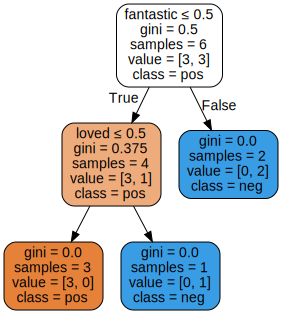

In [0]:
# We will *not* use the classifier to make predictions yet, but rather to understand the data we have.
# Specifically, which are the most discriminative features, and what are they useful to discriminate?
# In this example, which are the words whose presence tell us most about positive and negative documents?

# We import the graphviz library simply for visualizing the tree
import graphviz
os.environ["PATH"] += os.pathsep + ' C:\\Program Files\\Python36\\Lib\\site-packages\\graphviz'
print(os.environ)
dot_data = tree.export_graphviz(clf, out_file=None, 
                                feature_names=vectorizer.get_feature_names(),  
                                class_names=list(label2id.keys()),  
                                filled=True, 
                                rounded=True,  
                                special_characters=True)  
graph = graphviz.Source(dot_data)  
graph 

In [0]:
# Remember the type of data we are dealing with
for l in data:
    for tweet in data[l]:
        print(l,'->',tweet.strip())

neg -> terrible movie and awful plot
neg -> i did not like the scenery at all
neg -> plot was just awful
pos -> i loved the movie
pos -> the plot was fantastic
pos -> we loved the fantastic action


In [0]:
# Save the tree file to disk
graph.render(os.path.join(CURRENT_PATH+'test_tree'),format='png')

'/content/drive/My Drive/towards binary classification/test_sentimenttest_tree.png'

- Next session we'll look at making predictions and evaluating our model!